<a href="https://colab.research.google.com/github/reshma148/CSD/blob/main/Final_csd_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import  ImageDataGenerator as Imgen

In [ ]:
#Augmenting the training dataset
traingen = Imgen(
                 rescale=1./255,
                 shear_range= 0.2,
                 zoom_range = 0.3,
                 width_shift_range = 0.2,
                 height_shift_range  =0.2,
                 fill_mode = "nearest",
                 validation_split=0.15)
#Augmenting the testing dataset
testgen = Imgen(# rescale the images to 1./255
                rescale = 1./255
                )

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
trainds = traingen.flow_from_directory("/content/drive/MyDrive/brain classification/Training",
                                       target_size = (130,130),
                                       seed=123,
                                       batch_size  = 16,
                                       subset="training"
                                      )
valds = traingen.flow_from_directory("/content/drive/MyDrive/brain classification/Training",
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 16,
                                     subset="validation"
                                      )
testds = testgen.flow_from_directory("/content/drive/MyDrive/brain classification/Testing",
                                     target_size = (130,130),
                                     seed=123,
                                     batch_size  = 16,
                                     shuffle=False)

Found 4866 images belonging to 4 classes.
Found 856 images belonging to 4 classes.
Found 1321 images belonging to 4 classes.


In [ ]:
c = trainds.class_indices
classes = list(c.keys())
classes

['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
x,y = next(trainds)                             #function returns the next item in an iterator.
def plotImages(x,y):
    plt.figure(figsize=[15,11])                 #size of the plot
    for i in range(16):                         #16 images
        plt.subplot(4,4,i+1)                    #4 by 4 plot
        plt.imshow(x[i])                        #Imshow() is a function of matplotlib displays the image
        plt.title(classes[np.argmax(y[i])])     # Class of the image will be it's title
        plt.axis("off")
    plt.show()                                  #shows the figure or plot

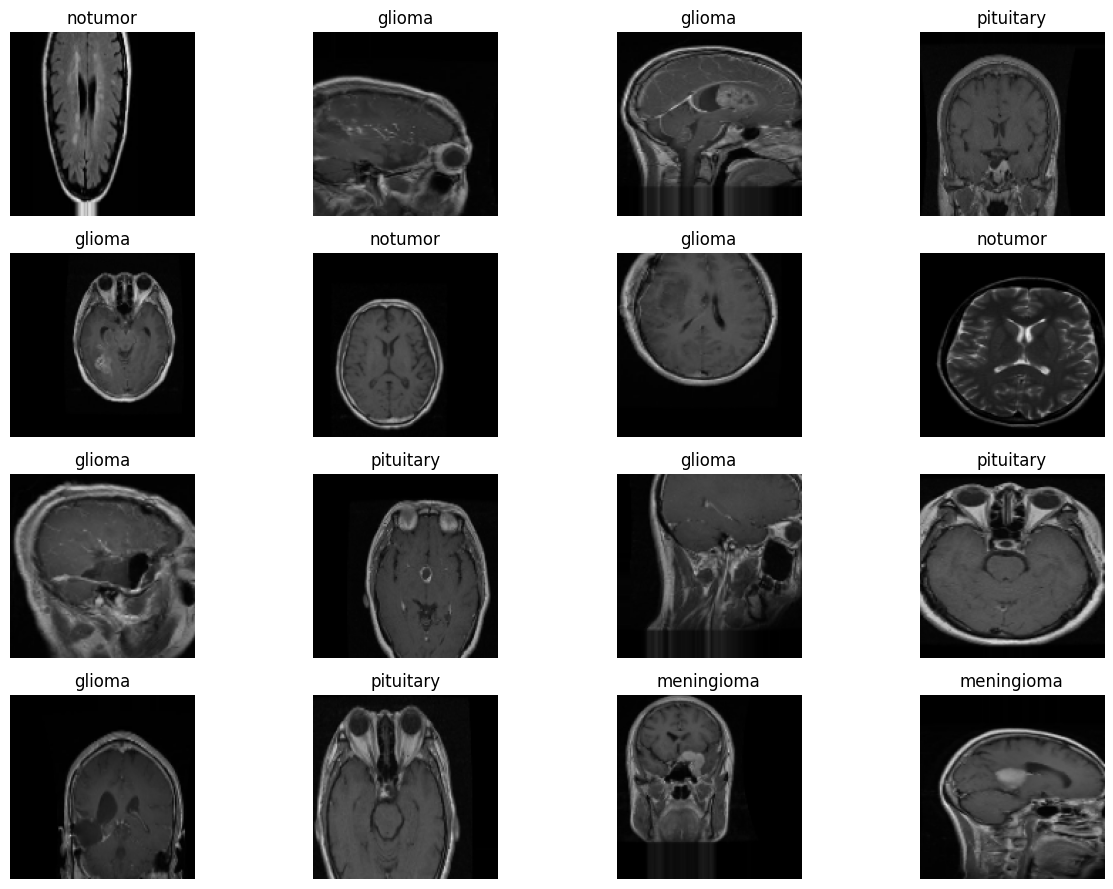

In [ ]:
#Call the plotImages function
plotImages(x,y)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Activation
from keras.metrics import categorical_crossentropy
from keras.optimizers import Adam

In [ ]:
cnn = Sequential([
    # first Layer
    Conv2D(filters=16, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=(130, 130, 3)),
    MaxPooling2D((2, 2)),
    # second layer
    Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.20),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='relu'),
    Dense(4, activation='softmax')
])

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 130, 130, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 65, 65, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 65, 65, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 32768)            

In [ ]:
cnn.compile(loss="categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [ ]:
history = cnn.fit(trainds,validation_data=valds,epochs=15, batch_size=16, verbose=1)

Epoch 1/15
305/305 [==============================] - 63s 204ms/step - loss: 1.0912 - accuracy: 0.4873 - val_loss: 0.9832 - val_accuracy: 0.5829
Epoch 2/15
305/305 [==============================] - 62s 203ms/step - loss: 0.8251 - accuracy: 0.6543 - val_loss: 0.8768 - val_accuracy: 0.6437
Epoch 3/15
305/305 [==============================] - 61s 199ms/step - loss: 0.7263 - accuracy: 0.6998 - val_loss: 0.8633 - val_accuracy: 0.6717
Epoch 4/15
305/305 [==============================] - 61s 200ms/step - loss: 0.6881 - accuracy: 0.7193 - val_loss: 0.8950 - val_accuracy: 0.6297
Epoch 5/15
305/305 [==============================] - 62s 203ms/step - loss: 0.6423 - accuracy: 0.7374 - val_loss: 0.8157 - val_accuracy: 0.6916
Epoch 6/15
305/305 [==============================] - 68s 221ms/step - loss: 0.6350 - accuracy: 0.7466 - val_loss: 0.9061 - val_accuracy: 0.6636
Epoch 7/15
305/305 [==============================] - 62s 202ms/step - loss: 0.6176 - accuracy: 0.7569 - val_loss: 0.8722 - val_ac

In [ ]:
cnn.evaluate(testds)

83/83 [==============================] - 6s 68ms/step - loss: 1.3414 - accuracy: 0.5874


[1.3414087295532227, 0.5874337553977966]

<Figure size 640x480 with 0 Axes>

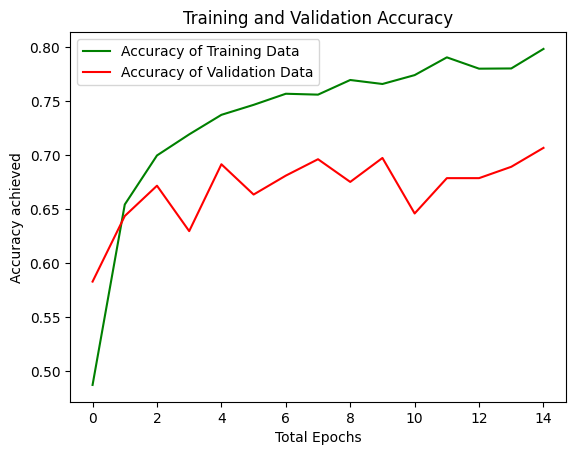

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(history.history['accuracy']))
plt.plot(epochs, history.history['accuracy'], 'green', label='Accuracy of Training Data')
plt.plot(epochs, history.history['val_accuracy'], 'red', label='Accuracy of Validation Data')
plt.xlabel('Total Epochs')
plt.ylabel('Accuracy achieved')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()


<ipython-input-43-287c4557fd22>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)


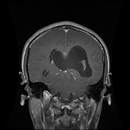

In [ ]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageOps
data = np.ndarray(shape=(1, 130, 130, 3), dtype=np.float32)
image = Image.open("/content/drive/MyDrive/brain classification/Training/glioma/Tr-glTr_0002.jpg")
size = (130, 130)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
display(image)
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
data[0] = normalized_image_array

In [ ]:
prediction = cnn.predict(data)
print(prediction)
predict_index = np.argmax(prediction)
print(predict_index)

1/1 [==============================] - 0s 23ms/step
[[0. 0. 1. 0.]]
2


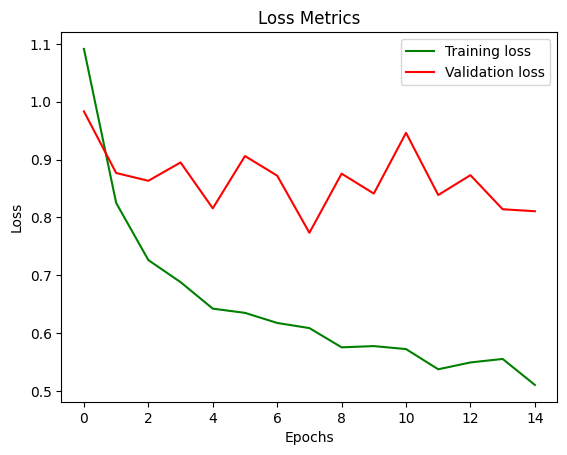

In [ ]:
plt.plot(epochs, history.history['loss'], 'green', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'red', label='Validation loss')
plt.title('Loss Metrics')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()